<a href="https://colab.research.google.com/github/Susovan88/Machine_Learning/blob/main/%20DecisionTrees/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease
Dataset Link - https://www.kaggle.com/datasets/oktayrdeki/heart-disease

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [37]:
df=pd.read_csv("/content/heart_disease.csv")
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [39]:
df.shape

(10000, 21)

In [40]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [41]:
df.isnull().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


In [42]:
## handeling missing numerical values.
num_cols = [
    'Age','Blood Pressure','Cholesterol Level','BMI',
    'Sleep Hours','Triglyceride Level',
    'Fasting Blood Sugar','CRP Level','Homocysteine Level'
]

for col in num_cols:
  df[col].fillna(df[col].median(),inplace=True)


/tmp/ipython-input-1223300445.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [43]:
## handeling missing catagorical values.
df["Alcohol_Missing"]=df['Alcohol Consumption'].isnull().astype(int)

cat_cols = [
    'Gender','Exercise Habits','Smoking','Family Heart Disease',
    'Diabetes','High Blood Pressure','Low HDL Cholesterol',
    'High LDL Cholesterol','Alcohol Consumption',
    'Stress Level','Sugar Consumption'
]

for col in cat_cols:
  df[col].fillna(df[col].mode()[0],inplace=True)

/tmp/ipython-input-625609799.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [44]:
df.isnull().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


In [45]:
df.drop_duplicates(inplace=True)
df.shape

(10000, 22)

In [46]:

for col in cat_cols:
  print(col," value counts -> ",df[col].value_counts())

Gender  value counts ->  Gender
Male      5022
Female    4978
Name: count, dtype: int64
Exercise Habits  value counts ->  Exercise Habits
High      3397
Medium    3332
Low       3271
Name: count, dtype: int64
Smoking  value counts ->  Smoking
Yes    5148
No     4852
Name: count, dtype: int64
Family Heart Disease  value counts ->  Family Heart Disease
No     5025
Yes    4975
Name: count, dtype: int64
Diabetes  value counts ->  Diabetes
No     5048
Yes    4952
Name: count, dtype: int64
High Blood Pressure  value counts ->  High Blood Pressure
Yes    5048
No     4952
Name: count, dtype: int64
Low HDL Cholesterol  value counts ->  Low HDL Cholesterol
Yes    5025
No     4975
Name: count, dtype: int64
High LDL Cholesterol  value counts ->  High LDL Cholesterol
No     5062
Yes    4938
Name: count, dtype: int64
Alcohol Consumption  value counts ->  Alcohol Consumption
Medium    5086
Low       2488
High      2426
Name: count, dtype: int64
Stress Level  value counts ->  Stress Level
Medium    34

In [47]:
# Encoding
ordinal_map_3 = {'Low': 0, 'Medium': 1, 'High': 2}
alcohol_map = {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3}

df['Exercise Habits']=df['Exercise Habits'].map(ordinal_map_3)
df['Stress Level']=df['Stress Level'].map(ordinal_map_3)
df['Sugar Consumption']=df['Sugar Consumption'].map(ordinal_map_3)

df['Alcohol Consumption'] = df['Alcohol Consumption'].map(alcohol_map)

In [48]:
# one hot encoding
df=pd.get_dummies(df,columns=['Gender'],drop_first=True,dtype='int')

In [49]:
binary_cols = [
    'Smoking',
    'Family Heart Disease',
    'Diabetes',
    'High Blood Pressure',
    'Low HDL Cholesterol',
    'High LDL Cholesterol',
    'Heart Disease Status'
]

for col in binary_cols:
  df[col]=df[col].map({'Yes':1,'No':0})

In [50]:
df['Gender_Male']

,Gender_Male
0,1
1,0
2,1
3,0
4,1
...,...
9995,0
9996,1
9997,1
9998,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10000 non-null  float64
 1   Blood Pressure        10000 non-null  float64
 2   Cholesterol Level     10000 non-null  float64
 3   Exercise Habits       10000 non-null  int64  
 4   Smoking               10000 non-null  int64  
 5   Family Heart Disease  10000 non-null  int64  
 6   Diabetes              10000 non-null  int64  
 7   BMI                   10000 non-null  float64
 8   High Blood Pressure   10000 non-null  int64  
 9   Low HDL Cholesterol   10000 non-null  int64  
 10  High LDL Cholesterol  10000 non-null  int64  
 11  Alcohol Consumption   10000 non-null  int64  
 12  Stress Level          10000 non-null  int64  
 13  Sleep Hours           10000 non-null  float64
 14  Sugar Consumption     10000 non-null  int64  
 15  Triglyceride Level  

# EDA

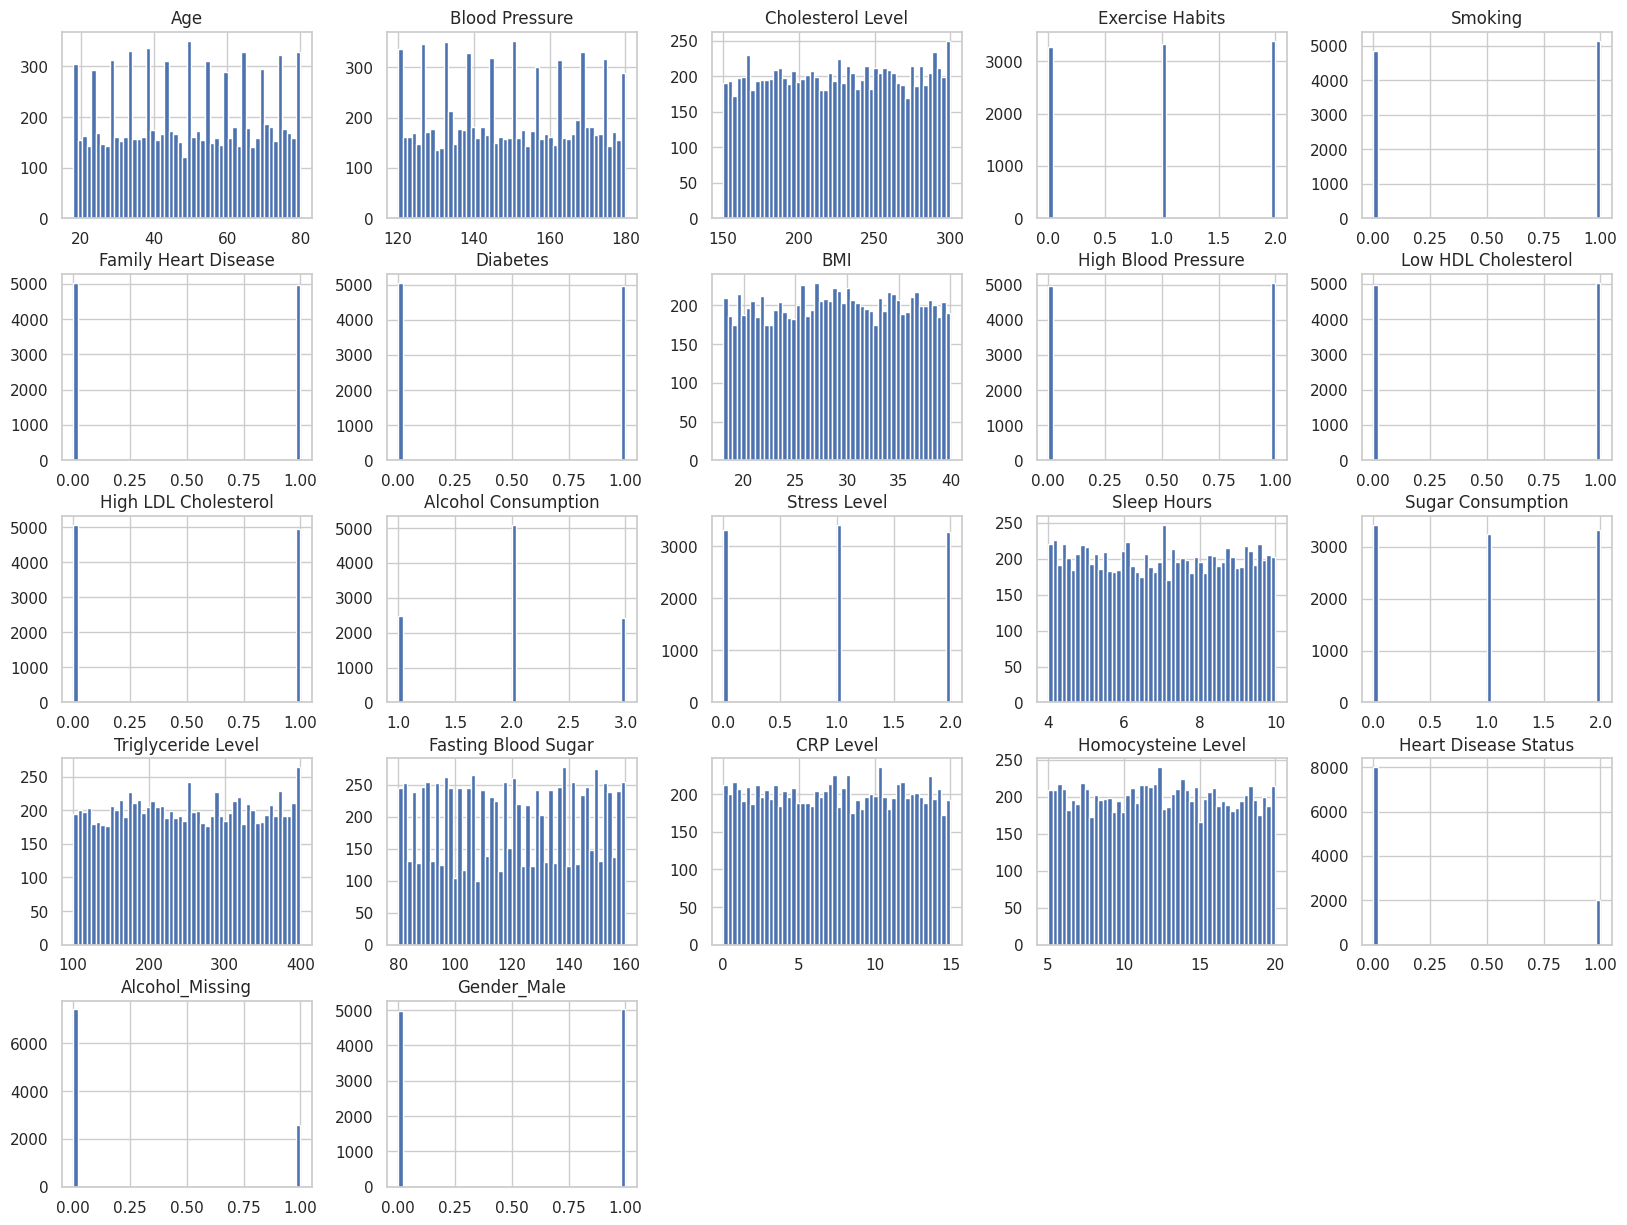

In [52]:
df.hist(bins=50,figsize=(20,15))
plt.show()

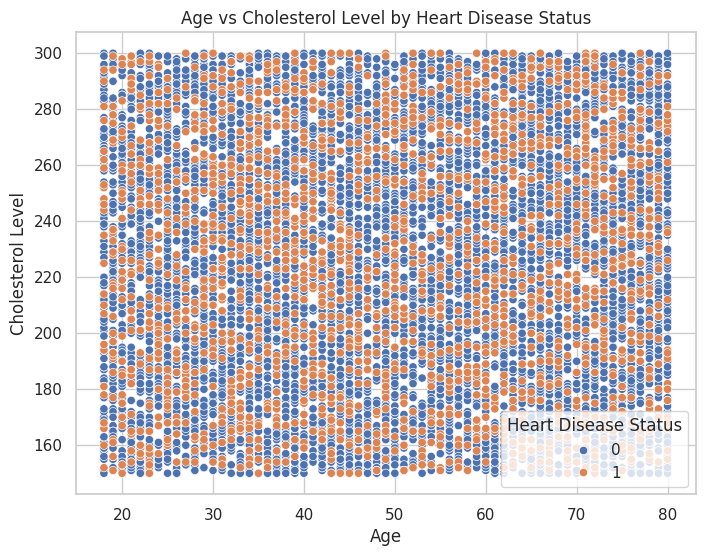

In [53]:
# Scatter plot: Age vs Cholesterol Level
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Cholesterol Level', hue='Heart Disease Status', data=df)
plt.title('Age vs Cholesterol Level by Heart Disease Status')
plt.show()


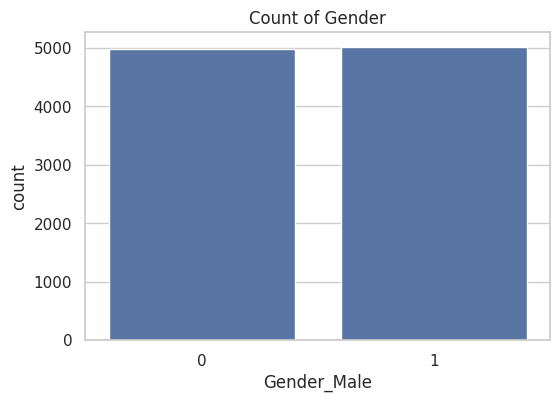

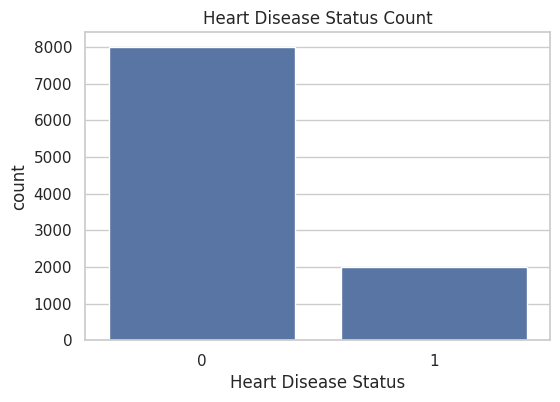

In [54]:
# Countplot for Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender_Male', data=df)
plt.title('Count of Gender')
plt.show()

# Countplot for Heart Disease Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart Disease Status', data=df)
plt.title('Heart Disease Status Count')
plt.show()


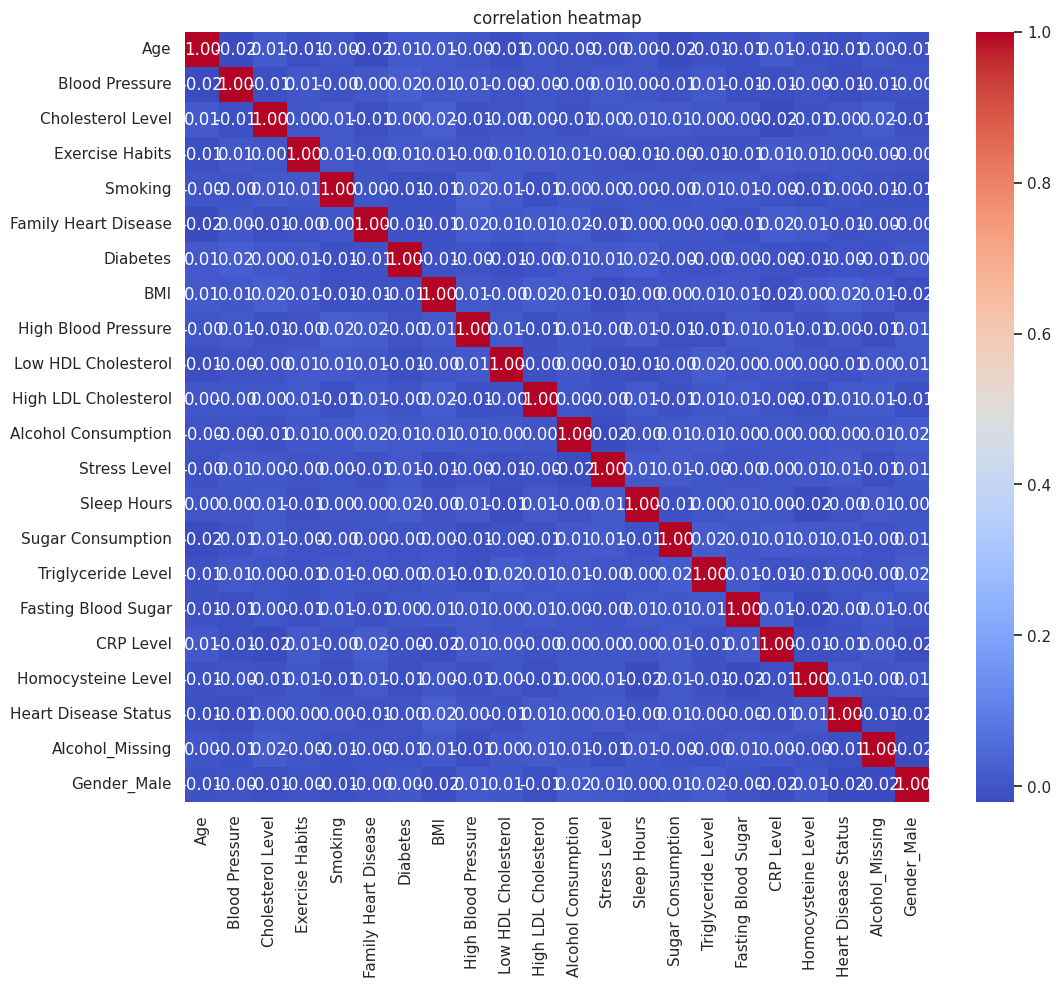

In [55]:
plt.figure(figsize=(12,10))
df_corr=df.corr()

sns.heatmap(df_corr,annot=True, cmap="coolwarm", fmt=".2f")
plt.title("correlation heatmap")
plt.show()
## non linear data

In [56]:
## feature scaling
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
num_cols = [
    'Age','Blood Pressure','Cholesterol Level','BMI',
    'Sleep Hours','Triglyceride Level',
    'Fasting Blood Sugar','CRP Level','Homocysteine Level'
]

df[num_cols]=std.fit_transform(df[num_cols])

In [57]:
X=df.drop(columns='Heart Disease Status')
y=df['Heart Disease Status']

print(X.shape,y.shape)

(10000, 21) (10000,)


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(class_weight='balanced',random_state=42)

dt_model.fit(X_train, y_train)

accuracy = dt_model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.692


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rfe = RFE(
    estimator=rf,
    n_features_to_select=12,
    step=1
)

# Fit ONLY on training data
rfe.fit(X_train, y_train)

# Transform
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Get selected feature names
selected_features = X_train.columns[rfe.support_]

print("Selected Features:", list(selected_features))


Selected Features: ['Age', 'Blood Pressure', 'Cholesterol Level', 'Exercise Habits', 'BMI', 'Alcohol Consumption', 'Sleep Hours', 'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']


In [61]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(class_weight='balanced',random_state=42)

dt_model.fit(X_train_selected, y_train)

accuracy = dt_model.score(X_test_selected, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6815


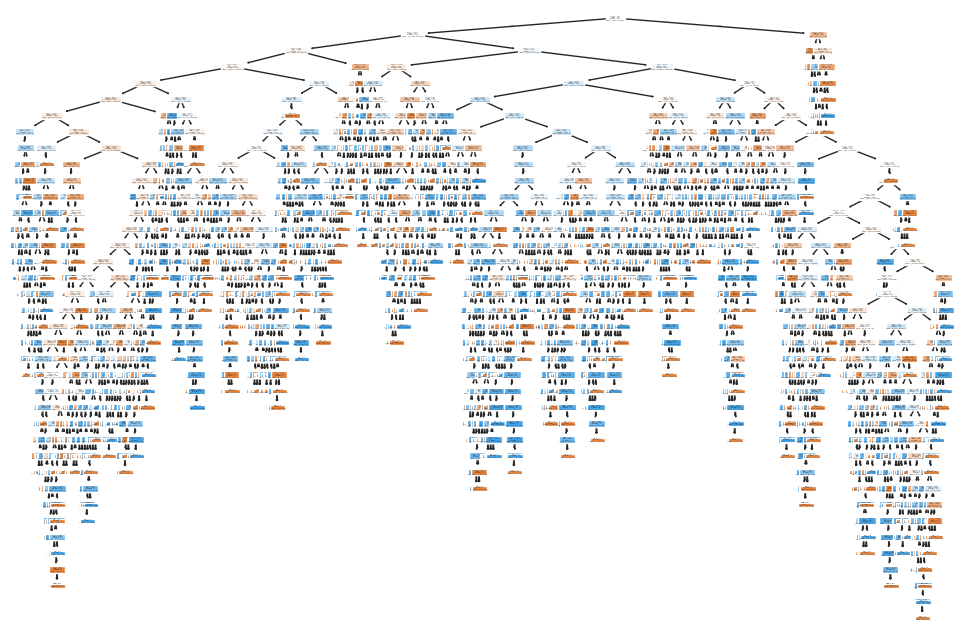

In [62]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

plt.figure(figsize=(12,8))
plot_tree(dt_model,filled=True)
plt.show()

In [63]:
all_conditions=export_text(dt_model,feature_names=X_train.columns[rfe.support_])
print(all_conditions)

|--- Homocysteine Level <= 1.69
|   |--- BMI <= -0.33
|   |   |--- Age <= 1.61
|   |   |   |--- Age <= 0.51
|   |   |   |   |--- Homocysteine Level <= 1.05
|   |   |   |   |   |--- Homocysteine Level <= 0.88
|   |   |   |   |   |   |--- Sleep Hours <= -1.54
|   |   |   |   |   |   |   |--- Age <= -1.47
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Age >  -1.47
|   |   |   |   |   |   |   |   |--- Cholesterol Level <= 1.09
|   |   |   |   |   |   |   |   |   |--- Sleep Hours <= -1.68
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Sleep Hours >  -1.68
|   |   |   |   |   |   |   |   |   |   |--- BMI <= -1.61
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- BMI >  -1.61
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |--- Cholesterol Level >  1.09
|   |   |   |   |   |   |   |   |   |--- Fasting 

Accuracy: 0.5635


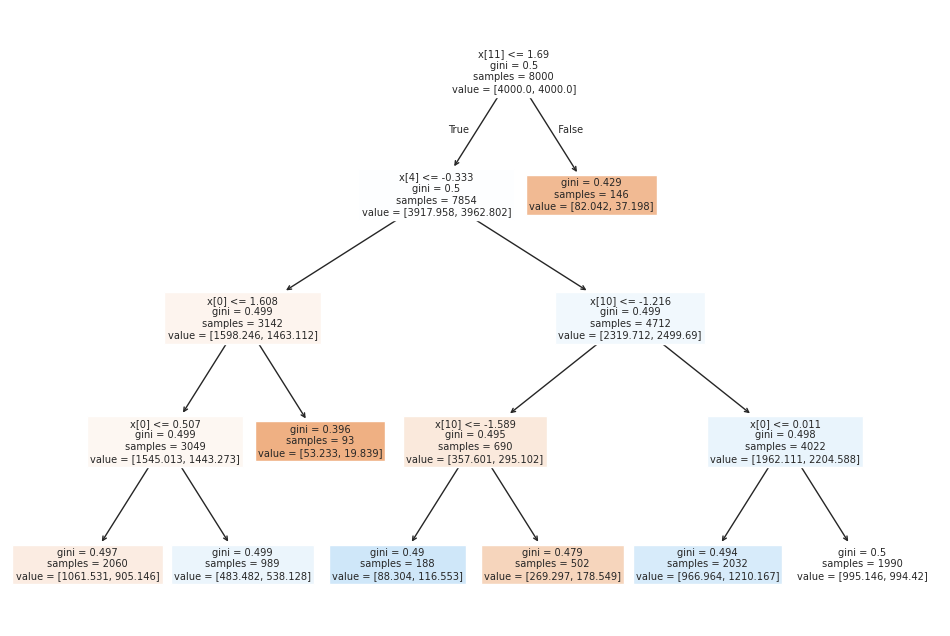

In [82]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(class_weight='balanced',random_state=42,max_depth=4,min_samples_split=200,max_features=6)

dt_model.fit(X_train_selected, y_train)

accuracy = dt_model.score(X_test_selected, y_test)
print(f"Accuracy: {accuracy}")

plt.figure(figsize=(12,8))
plot_tree(dt_model,filled=True)
plt.show()

In [67]:
!pip install dtreeviz  # for more effective Decision Tree Visualization

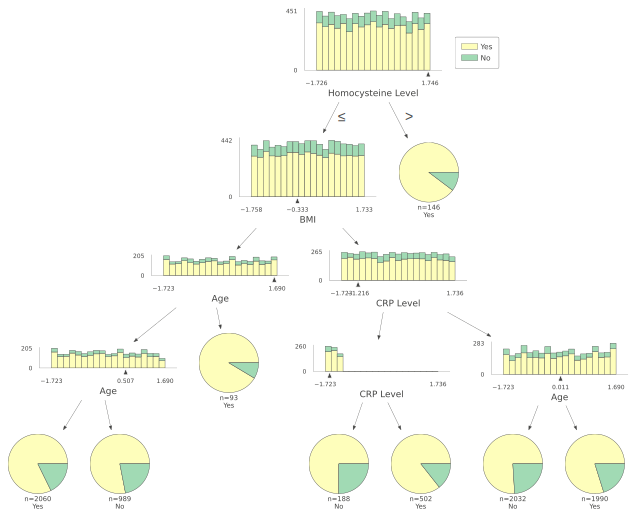

In [96]:
from dtreeviz.trees import model
viz=model(dt_model,
             X_train_selected,
             y_train,
             feature_names=selected_features,
             class_names=['Yes','No'],
          )
viz.view()

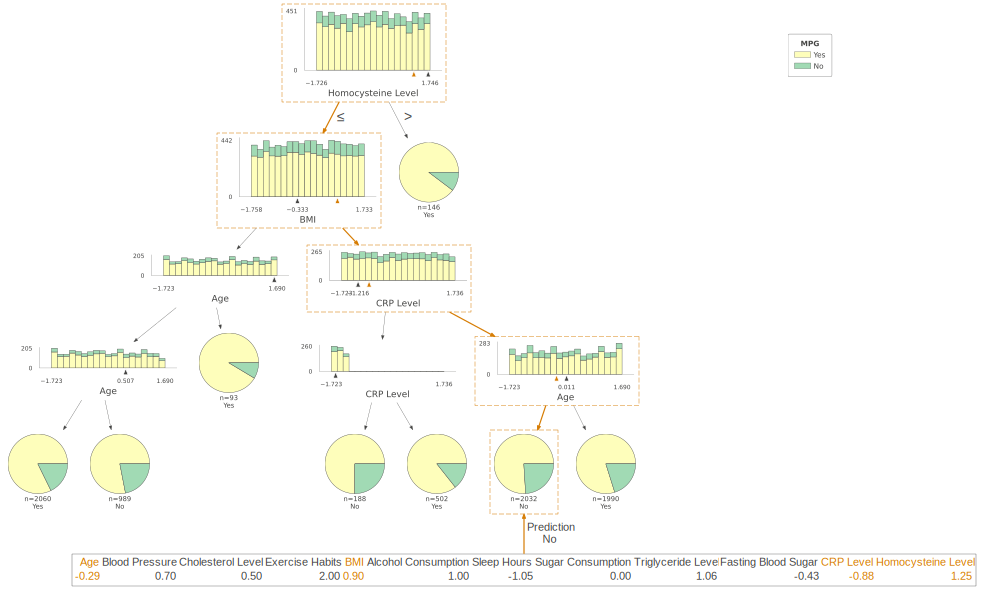

In [94]:
# take random ponit and check how prediction is works
x_random=X_test_selected[np.random.randint(0,X_test_selected.shape[0])]

viz.view(x=x_random) # prediction path


Accuracy: 0.5085


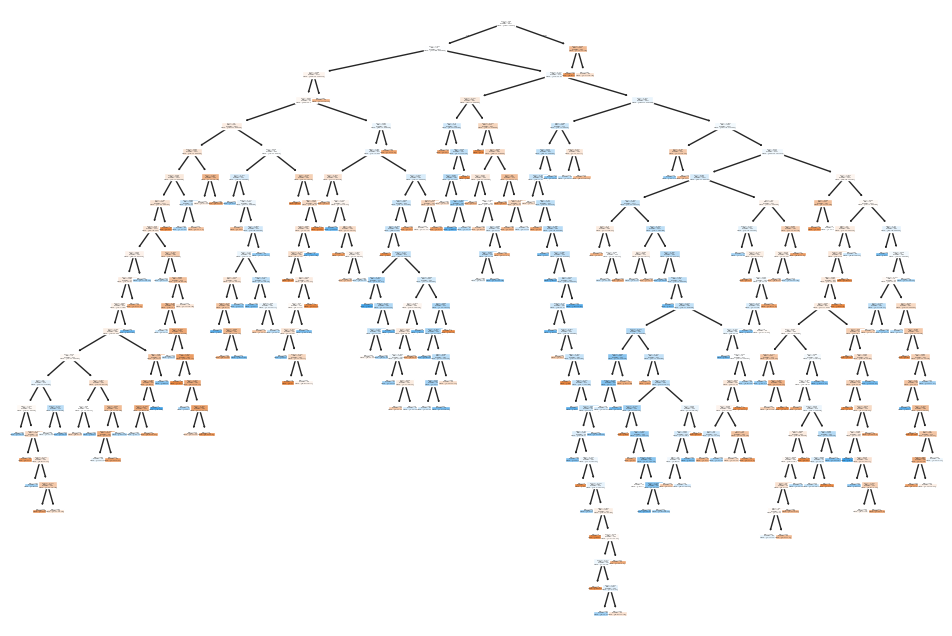

In [74]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(class_weight='balanced',random_state=42,min_samples_split=100,max_features=6)

dt_model.fit(X_train_selected, y_train)

accuracy = dt_model.score(X_test_selected, y_test)
print(f"Accuracy: {accuracy}")

plt.figure(figsize=(12,8))
plot_tree(dt_model,filled=True)
plt.show()

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm=SVC(kernel='rbf',C=10,class_weight='balanced',random_state=42)
svm.fit(X_train_selected,y_train)

y_pred = svm.predict(X_test_selected)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.557

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.59      0.68      1613
           1       0.19      0.41      0.26       387

    accuracy                           0.56      2000
   macro avg       0.50      0.50      0.47      2000
weighted avg       0.69      0.56      0.60      2000


Confusion Matrix:
 [[955 658]
 [228 159]]
